<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/12-RF_featured-vif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U pandas-profiling

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
import numpy as np
import pandas_profiling

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv("./credit_cards_dataset.csv")

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# df.profile_report()

독립 변수 X는 종속 변수 Y 하고만 상관 관계가 있어야 하며, 독립 변수끼리 상관 관계가 있어서는 안 됩니다. 독립 변수간 상관 관계를 보이는 것을 다중공선성(Multicollinearity)이라고 합니다. 다중공선성이 있으면 부정확한 회귀 결과가 도출됩니다.

VIF는 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도입니다. (Reference1) 수식은 아래와 같습니다.

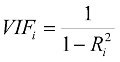

VIF가 10이 넘으면 다중공선성 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 봅니다. 독립 변수 a와 b가 서로 상관 관계가 있다고 했을 때 두 변수 모두 VIF가 높습니다. 

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data= df.drop(['default.payment.next.month','ID'],1)
vif = pd.DataFrame()
vif['Features']= data.columns
vif['vif']= [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Features,vif
0,LIMIT_BAL,4.037479
1,SEX,9.092210
2,EDUCATION,6.731119
3,MARRIAGE,6.265388
4,AGE,10.857679
5,PAY_0,1.918276
6,PAY_2,3.211217
7,PAY_3,3.727427
8,PAY_4,4.440120
9,PAY_5,4.985856


In [10]:
df['PAY_AVR']=df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

In [11]:
df['BILL_AVR']=df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

In [12]:
df['AMT_AVR']=df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

In [13]:
df_featured = df.drop(['SEX','ID', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)

In [14]:
vif = pd.DataFrame()
vif['Features']= df_featured.columns
vif['vif']= [variance_inflation_factor(df_featured.values,i) for i in range(df_featured.shape[1])]
vif

,Features,vif
0,LIMIT_BAL,3.919475
1,EDUCATION,6.384270
2,MARRIAGE,5.096995
3,AGE,9.865809
4,default.payment.next.month,1.400487
5,PAY_AVR,1.502927
6,BILL_AVR,2.187163
7,AMT_AVR,1.575940


In [15]:
#print("Original shape of the data: "+ str(df.shape))
features_names = df_featured

In [16]:
columns = list(df_featured.columns)

In [17]:
columns = ['LIMIT_BAL',  'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_AVR', 'BILL_AVR', 'AMT_AVR','default.payment.next.month']

In [18]:
df = df_featured[columns]

In [19]:
#df.describe()

In [20]:
X = df.drop('default.payment.next.month', axis =1).values
y = df['default.payment.next.month'].values
print(X.shape)
print(y.shape)

(30000, 7)
(30000,)


Split my data into training and testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

Instantiate the random forest model with 200 trees

In [22]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [23]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       n_estimators=200)

In [24]:
y_predict = rf.predict(X_test)

Check feature importance


In [25]:
sorted(zip(rf.feature_importances_, features_names), reverse=True)

[(0.2895734428656978, 'default.payment.next.month'),
 (0.1992419277526288, 'BILL_AVR'),
 (0.1956606169378784, 'PAY_AVR'),
 (0.12755128810785193, 'AGE'),
 (0.12511798351074013, 'LIMIT_BAL'),
 (0.039088187673128424, 'EDUCATION'),
 (0.023766553152074602, 'MARRIAGE')]

In [ ]:
## plot the importances ##
import matplotlib.pyplot as plt
importances = rf.feature_importances_


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), features_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Making my prediction and seeing how well my model predicted by checking recall, precision, F1 score and making a confusion matrix.

Recall -tells us generally or overall how well our model predicted based on 
        the total of how much it correctly predicted /correctly predicted +                           how many where actually right but predicted wrong.
                        
                        formula = TP/TP+FN
                        
Precision -tells us or gives us true measure how well our model predicted it                              shows correctly predicted /correctly predicted + how many the model                            predicted to be positive but where false.

                       formula = TP/TP+FP
                       
F1 score - gives us a mean of precision and recall, a sumarization of how well it                        did in respect to recall and precision.


In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [28]:
X_test.shape

(9000, 7)

In [29]:
#Make my predictions
y_prediction = rf.predict(X_test)

In [30]:
y_probability = rf.predict_proba(X_test)

In [31]:
y_probability.shape

(9000, 2)

In [32]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.3086734693877551


In [33]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
# This shows overall acuracy of how well it will predict defualt or non_default
# The scores corresponding to every class will tell you the accuracy of the classifier 
# in classifying the data points in that particular class compared to all other classes.
# The support is the number of samples of the true response that lie in that class.

print(classification_report(y_test, y_prediction,
                            target_names=["non_default", "default"]))

              precision    recall  f1-score   support

 non_default       0.83      0.94      0.88      7040
     default       0.60      0.31      0.41      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.63      0.64      9000
weighted avg       0.78      0.80      0.78      9000



In [35]:
# Creating confusion matrix would give us a ration of non-default compared 
# to default.

In [36]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6631  409]
 [1355  605]]


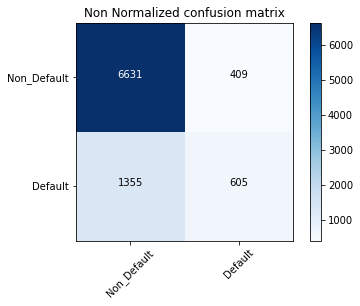

In [38]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')